# Exercise 1: Reading and Exploring Raster Data

Open the single-band DEM image using rasterio.

Retrieve and print the raster metadata, including the CRS, resolution, bounds, number of bands, and data types.

Display the raster’s width, height, and pixel data types to understand the grid dimensions and data structure.

In [17]:
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy    as np
import matplotlib.pyplot as plt


In [18]:
singleband_file = 'https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif'
sr=rasterio.open(singleband_file)


In [19]:
sr.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': None,
 'width': 4269,
 'height': 3113,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'),
 'transform': Affine(90.0, 0.0, -13442488.3428,
        0.0, -89.99579177642138, 4668371.5775)}

In [20]:
print(f"Width: {sr.width} Height: {sr.height}, Datatype: {sr.dtypes} CRS: {sr.crs}" )

Width: 4269 Height: 3113, Datatype: ('int16',) CRS: EPSG:3857


In [21]:
sr.dtypes

('int16',)

# Exercise 2: Visualizing and Manipulating Raster Bands
Visualize the single-band DEM using a custom colormap (e.g., cmap=’terrain’).

Open the multispectral image and visualize the first band using a suitable colormap.

Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) and stack them to create an RGB composite image.

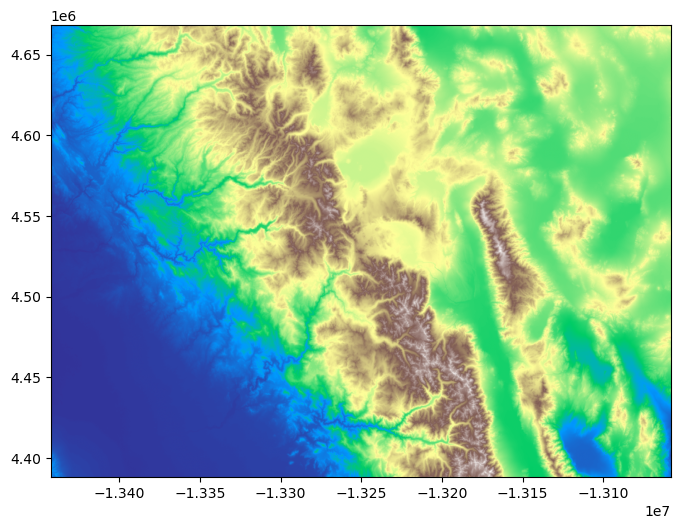

In [22]:
# Visualize the single-band DEM using a custom colormap (e.g., cmap=’terrain’).
fig,ax = plt.subplots(figsize=(8,8))
rasterio.plot.show(sr,cmap='terrain')
plt.show()

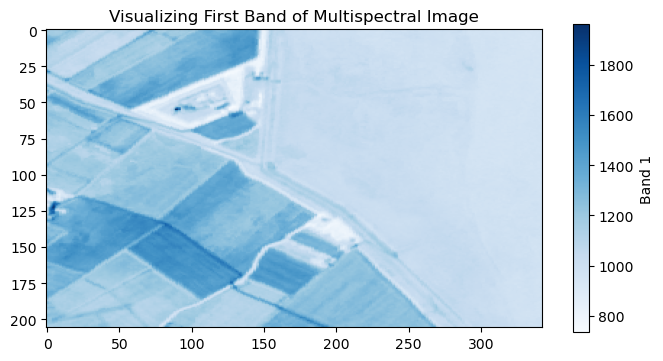

In [23]:
# Open the multispectral image and visualize the first band using a suitable colormap.
multiband_file = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
multi=rasterio.open(multiband_file)
fig,ax = plt.subplots(figsize = (8,8))
first_band = multi.read(2)
plt.imshow(first_band,cmap='Blues')
plt.colorbar (label='Band 1', shrink = 0.5)
plt.title('Visualizing First Band of Multispectral Image')
plt.show()


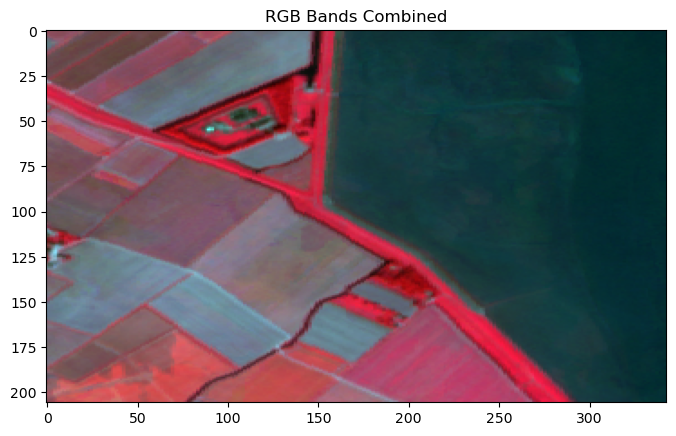

In [24]:
# Combine multiple bands from the multispectral image (e.g., Red, Green, and Blue) 
# and stack them to create an RGB composite image.

def normalize(band):
   return (band-band.min()) / (band.max()-band.min())

red_band = multi.read(4)
green_band = multi.read(3)
blue_band = multi.read(2)

normal_red = normalize(red_band)
normal_green = normalize(green_band)
normal_blue = normalize (blue_band)

rgb = np.dstack((normal_red,normal_green,normal_blue))

plt.figure(figsize=(8,8))
plt.imshow(rgb)
plt.title("RGB Bands Combined")
plt.show()

# Exercise 3: Raster Clipping with Array Indexing
Open the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).

Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.

Save the clipped raster subset to a new file named clipped_multispectral.tif.

In [25]:
# 0pen the multispectral image and clip a geographic subset using array indexing (specifying row and column ranges).

data = multi.read()
data.shape

(4, 206, 343)

In [76]:
#Selecting a subset only
subset = data[:,25:195,50:280]
print(subset.shape)


(4, 170, 230)


In [115]:
#Normalizing the values
n_red = normalize(subset[3])
n_green= normalize(subset[2])
n_blue = normalize(subset[1])

print(f"Original Shape of array {subset.shape}")
rgb_subsetnp = np.dstack((n_red,n_green,n_blue))
print(f"Shape changed due to stack (rgb_sebsetnp) {rgb_subsetnp.shape}")



Original Shape of array (4, 170, 230)
Shape changed due to stack (rgb_sebsetnp) (170, 230, 3)


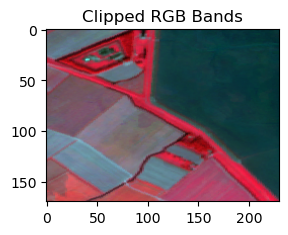

In [116]:
#Visualize the clipped portion of the image using matplotlib to ensure the subset is correct.
# Plot the stacked array
if rgb_subsetnp.shape[2] == 3:
    plt.figure(figsize=(3,3))
    plt.imshow(rgb_subsetnp)
    plt.title("Clipped RGB Bands")
    plt.show()

In [119]:
# NOw i wan to save the clipped image
# Define the new profile
profile = multi.profile
profile.update(
    width=rgb_subsetnp.shape[1], 
    height=rgb_subsetnp.shape[0], 
    driver='GTiff',
    count=3,
    compress='lzw')   
profile

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 230, 'height': 170, 'count': 3, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(8.983152841195215e-05, 0.0, 6.860074498707138,
       0.0, -8.983152841195215e-05, 53.41634207654228), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

In [139]:
# Save the clipped image

print(f'rgb_subset Shape after profile update: {rgb_subsetnp.shape}')

# Print the shape of the array to confirm
print(f'Shape of rgb_subsetnp: {rgb_subsetnp.shape}')

# Transpose the array to match the format (bands, rows, columns)
rgb_subsetnp_transposed = rgb_subsetnp.transpose((2, 0, 1))
print(f"After transposition array shape is {rgb_subsetnp_transposed.shape}")

with rasterio.open('clipped_multispectral.tif', 'w', **profile) as dst:
    dst.write(rgb_subsetnp_transposed)
    print("Clipped Image Saved Successfully")

rgb_subset Shape after profile update: (170, 230, 3)
Shape of rgb_subsetnp: (170, 230, 3)
After transposition array shape is (3, 170, 230)
Clipped Image Saved Successfully


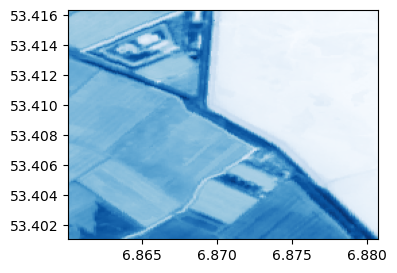

In [ ]:

#verifying that the file is correctly written
with rasterio.open("clipped_multispectral.tif") as verify:
    fig, ax = plt.subplots(figsize=(4, 4))
    rasterio.plot.show(verify,cmap='Blues', ax=ax)
    plt.show()
